# `ks` package and the importance of binning grid sizes

A notebook to explore the behavior of the `ks` package and the grid sizes chosen when binning for FFT computation of KDEs. Motivated by the results of *Attempt 4* in `confregs_levelsets_3.ipynb`, which show that if the binning grid size is chosen to be small (more coarse grid), then the corresponding confidence region is systematically off (lower, or down and to the right of the true isoline), even with extremely high sample sizes ($n = 20000$). When the grid size is comparable to the grid size on which we are projecting, the bias is all but gone (and coverage rates are a bit higher, as we would expect.)

## Demo Using Single Dataset: Discretization Gridsize Matters

In [2]:
library(ks)
library(dplyr)
library(ggplot2)
library(mvtnorm)
library(MASS)

In [7]:
source('/global/homes/j/jbbutler/isolines_uq/scripts/R/utils.R')

Generating the data

In [2]:
n <- 20000
dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

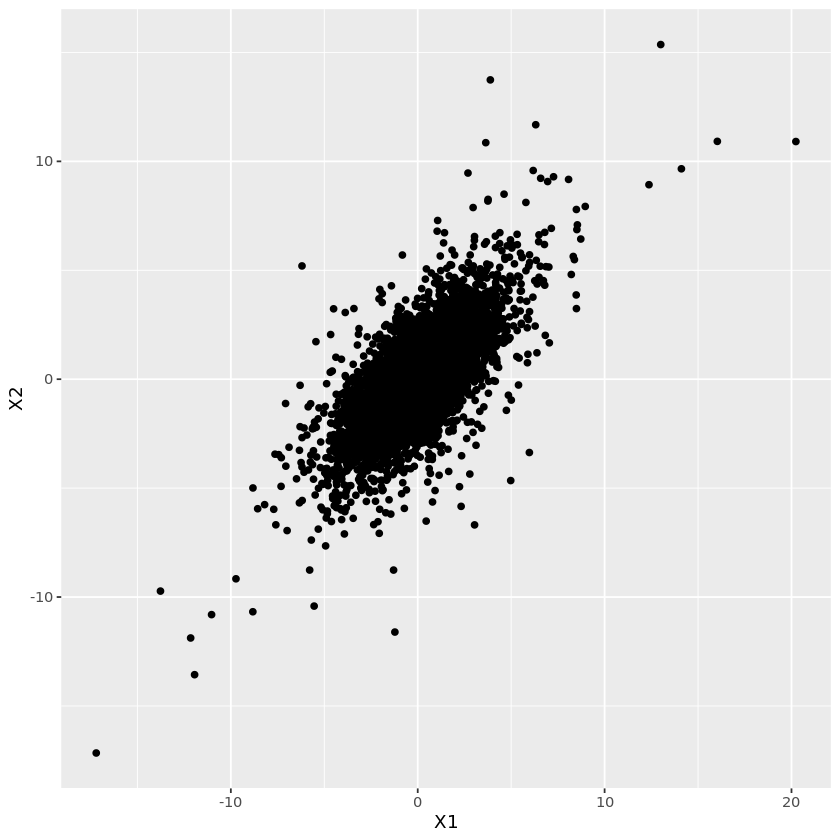

In [3]:
ggplot(dat) + geom_point(aes(x = X1, y = X2))

Now to compare the survival functions for different combinations of binning grid sizes and projection grid sizes.

### Combination 1

In [95]:
lb <- -5
ub <- 5
gticks <- 500
gsize <- 150

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [96]:
# making the survival function
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
plt_df1 <- data.frame(X1 = surv_func$eval.points$X1, X2 = surv_func$eval.points$X2, Z = surv_func$estimate)

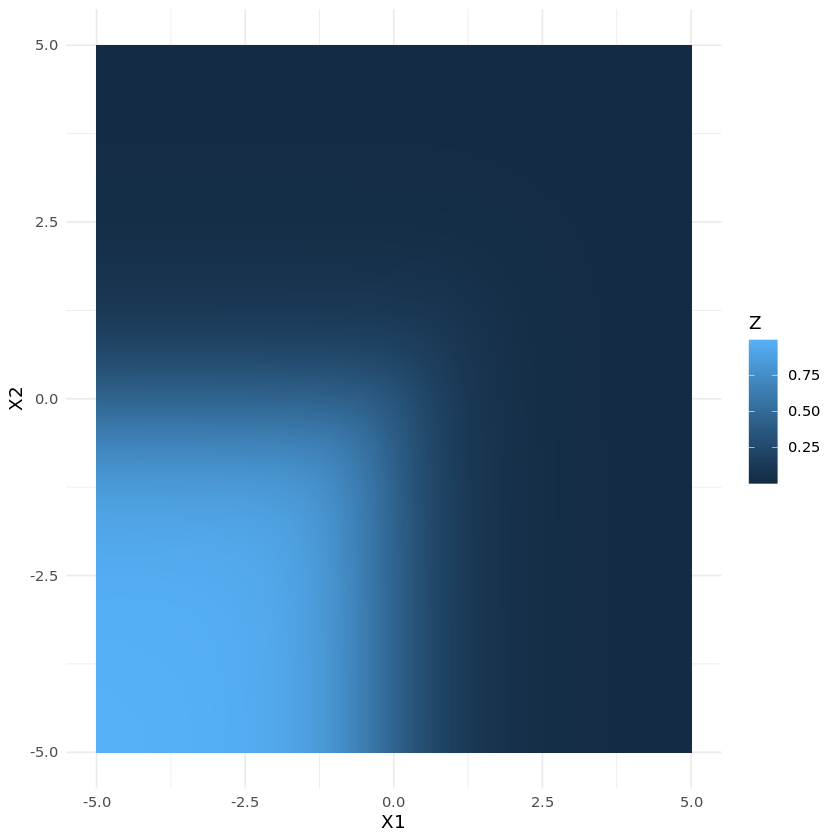

In [97]:
ggplot(plt_df1) + geom_tile(aes(x = X1, y = X2, fill = Z)) + theme_minimal()

### Combination 2

In [98]:
lb <- -5
ub <- 5
gsize <- 250

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [99]:
# making the survival function
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
plt_df2 <- data.frame(X1 = surv_func$eval.points$X1, X2 = surv_func$eval.points$X2, Z = surv_func$estimate)

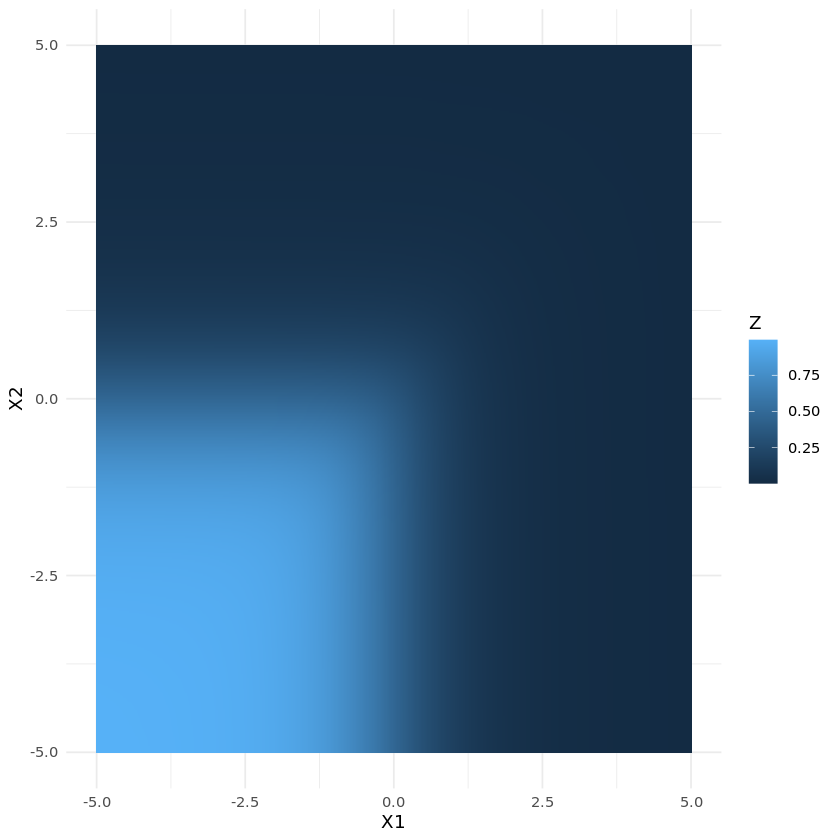

In [100]:
ggplot(plt_df2) + geom_tile(aes(x = X1, y = X2, fill = Z)) + theme_minimal()

### Combination 3

In [101]:
lb <- -5
ub <- 5
gsize <- 350

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [102]:
# making the survival function
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
plt_df3 <- data.frame(X1 = surv_func$eval.points$X1, X2 = surv_func$eval.points$X2, Z = surv_func$estimate)

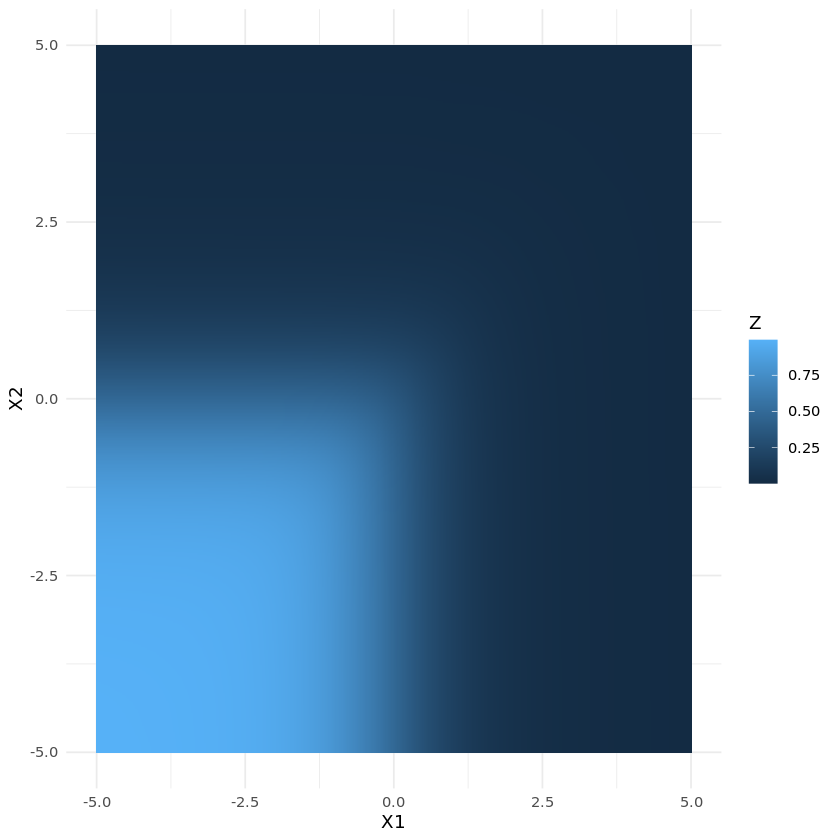

In [103]:
ggplot(plt_df3) + geom_tile(aes(x = X1, y = X2, fill = Z)) + theme_minimal()

### Combination 4

In [104]:
lb <- -5
ub <- 5
gsize <- 450

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [105]:
# making the survival function
xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
plt_df4 <- data.frame(X1 = surv_func$eval.points$X1, X2 = surv_func$eval.points$X2, Z = surv_func$estimate)

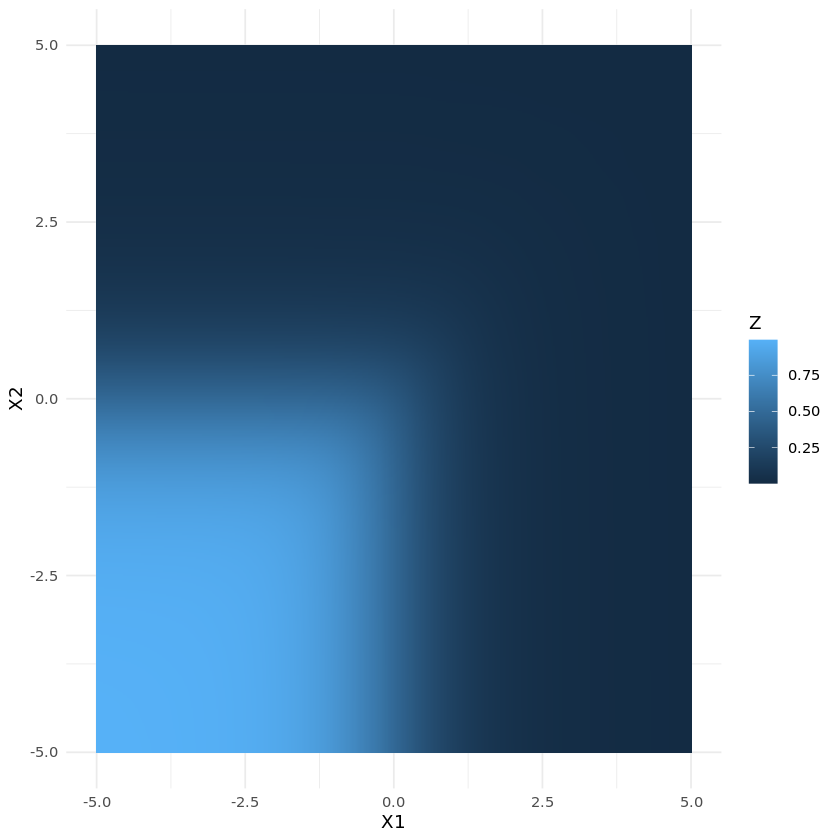

In [106]:
ggplot(plt_df4) + geom_tile(aes(x = X1, y = X2, fill = Z)) + theme_minimal()

## Comparing Combinations

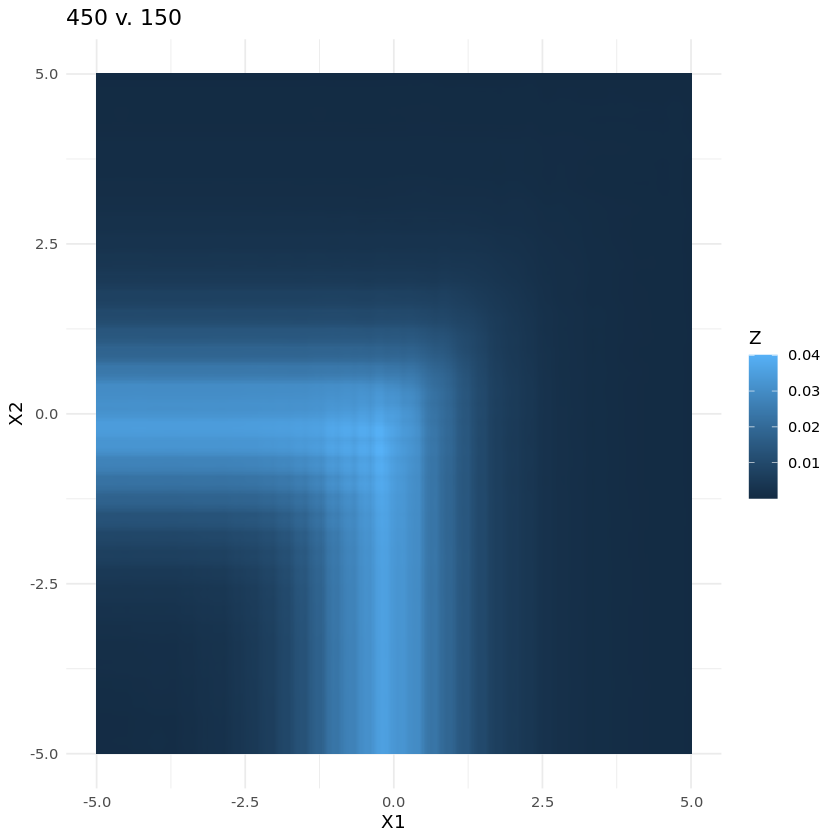

In [107]:
diff <- data.frame(X1=plt_df1$X1, X2=plt_df1$X2, Z=plt_df4$Z-plt_df1$Z)
ggplot(diff) + geom_tile(aes(x = X1, y = X2, fill = Z)) + 
    ggtitle('450 v. 150') + 
    theme_minimal()

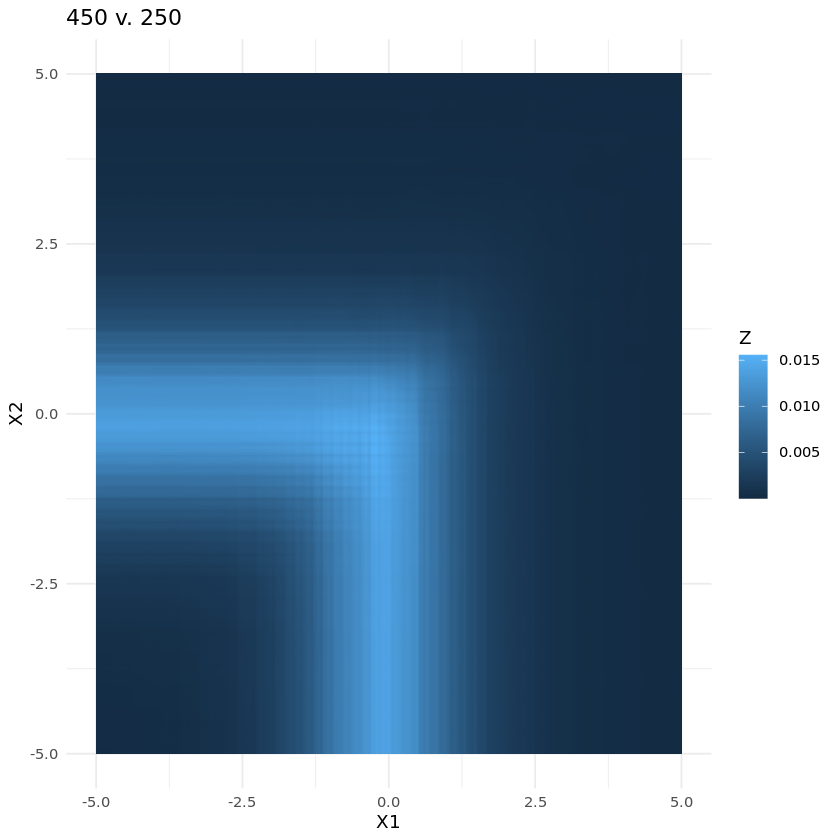

In [108]:
diff <- data.frame(X1=plt_df1$X1, X2=plt_df1$X2, Z=plt_df4$Z-plt_df2$Z)
ggplot(diff) + geom_tile(aes(x = X1, y = X2, fill = Z)) + ggtitle('450 v. 250') + 
    theme_minimal()

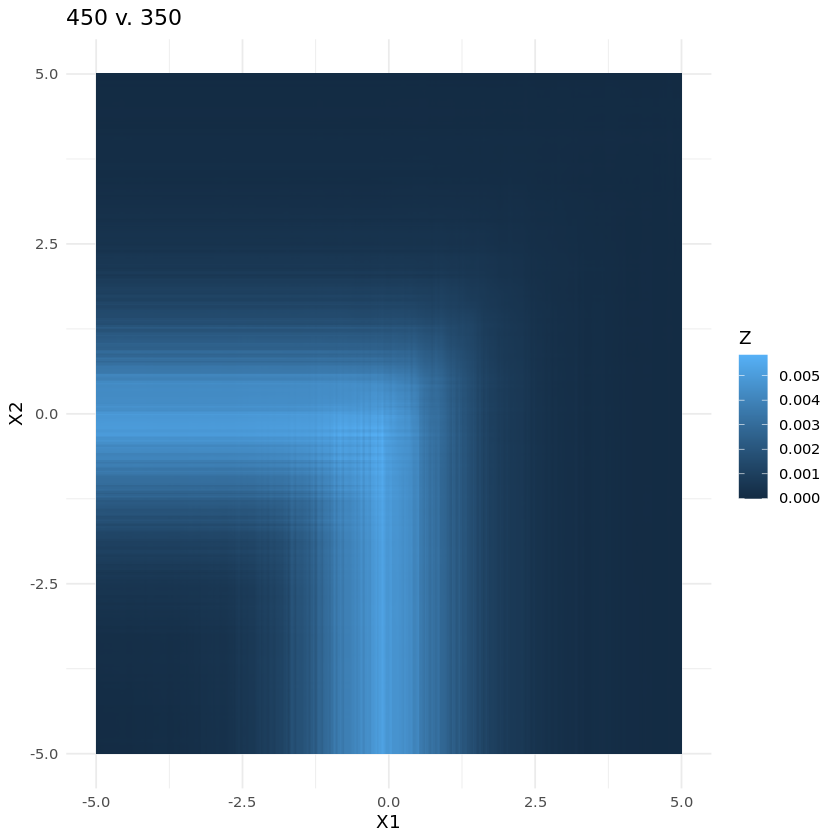

In [109]:
diff <- data.frame(X1=plt_df1$X1, X2=plt_df1$X2, Z=plt_df4$Z-plt_df3$Z)
ggplot(diff) + geom_tile(aes(x = X1, y = X2, fill = Z)) + ggtitle('450 v. 350') + 
    theme_minimal()

Different resolutions lead to different grids, but why are there such large differences only at those points? They seem to taper off eventually, but still interesting how there can be such large differences. But just goes to show that my attempt to use the bootstrap to estimate the sup differences is going to hit a roadblock because of these grid size issues (even if I used the same sample, I would have a nonzero sup difference between the function estimates.)

## Exploring Convergence of Binned KDE Approx to KDE, in discretization resolution

Exploring how the gridsize chosen for the binned KDE estimates impacts deviation from the "true" KDE (KDE evaluated not using any binning). To be used to justify choices of gridsize for time-saving approximation in future analyses (especially due to the repeated computations in the bootstrap loop)

In [35]:
path <- '/global/cscratch1/sd/jbbutler/surv_funcs/'

In [56]:
tot_files <- list.files(path=path)

In [ ]:
b_gridsizes <- c(100, 200, 300, 400, 500)
lb <- -5
ub <- 5

In [64]:
results_list <- vector(mode='list', length = length(b_gridsizes))
mean_list <- vector(mode = 'list', length = length(tot_files))

for (k in 1:length(tot_files)) {
    fname <- tot_files[k]
    num_files <- length(list.files(path = paste0(path, fname, '/')))
    for (i in 1:length(b_gridsizes)) {
        supdiffs <- rep(0, num_files)
        for (j in 1:num_files) {
            # load up that dataset's true survival function
            surv_obj <- readRDS(paste0(path, fname, '/', j, '_', fname, '.RData'))
            dat <- surv_obj$data
            grid <- surv_obj$grid
            surv_vals <- surv_obj$surv
        
            # recomputing the bandwidths to use in KDE
            bw <- c(bandwidth.nrd(dat[,1]), bandwidth.nrd(dat[,2]))
            H <- (diag(bw)/4)**2
            xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
            xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
        
            binned_surv <- kcde(dat, H=H, eval.points=grid, gridsize=b_gridsizes[i], tail.flag='upper', xmin=xmin, xmax=xmax)
            supdiff <- max(abs(binned_surv$est - surv_vals))
            supdiffs[j] <- supdiff
            }
        results_list[[i]] <- supdiffs
        }
    results_df <- as.data.frame(results_list)
    colnames(results_df) <- as.character(b_gridsizes)
    means <- as.vector(colMeans(results_df))
    mean_list[[k]] <- means
    
}

In [77]:
means_df <- as.data.frame(mean_list)
colnames(means_df) <- c('n10000', 'n1000', 'n15000', 'n20000', 'n3000', 'n5000')

In [78]:
means_df <- means_df %>% mutate(bgsizes = b_gridsizes)

In [79]:
means_df

n10000,n1000,n15000,n20000,n3000,n5000,bgsizes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.06907049,0.036789861,0.07586448,0.08061512,0.051907835,0.05742155,100
0.03376770,0.018052321,0.03705684,0.03947870,0.025348473,0.02788206,200
0.02227618,0.011972257,0.02443994,0.02599739,0.016767504,0.01838678,300
0.01661343,0.008961382,0.01822077,0.01937428,0.012523905,0.01371200,400
0.01325030,0.007167625,0.01452897,0.01544700,0.009994759,0.01093409,500


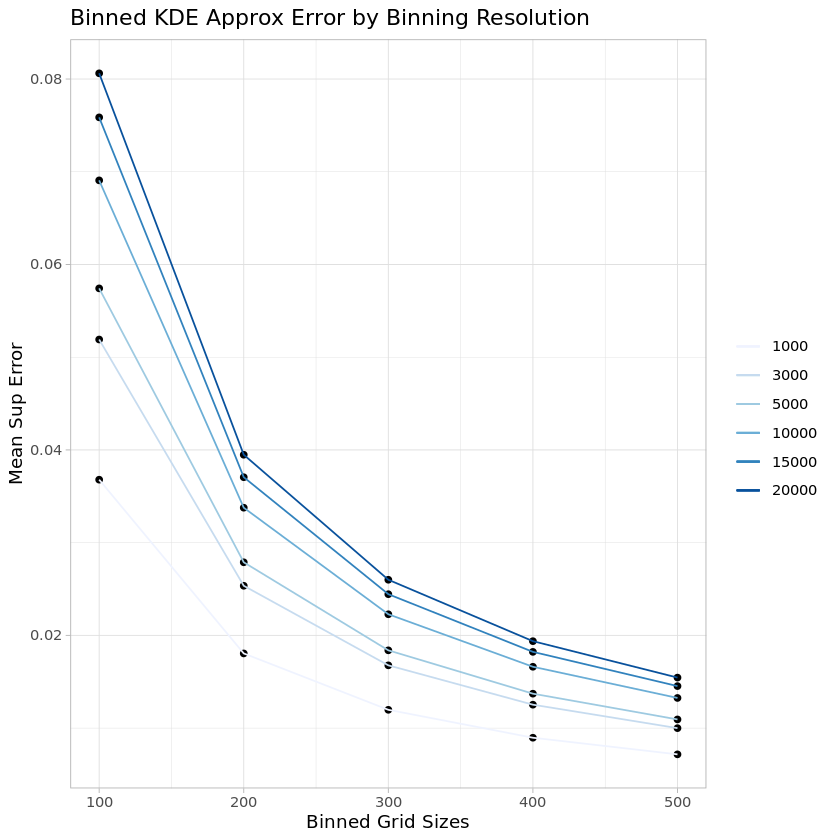

In [105]:
ggplot(means_df) + geom_point(aes(x = bgsizes, y = n1000)) + geom_line(aes(x = bgsizes, y = n1000, color = 'a')) +
    geom_point(aes(x = bgsizes, y = n3000)) + geom_line(aes(x = bgsizes, y = n3000, color = 'b')) +
    geom_point(aes(x = bgsizes, y = n5000)) + geom_line(aes(x = bgsizes, y = n5000, color = 'c')) +
    geom_point(aes(x = bgsizes, y = n10000)) + geom_line(aes(x = bgsizes, y = n10000, color = 'd')) +
    geom_point(aes(x = bgsizes, y = n15000)) + geom_line(aes(x = bgsizes, y = n15000, color = 'e')) +
    geom_point(aes(x = bgsizes, y = n20000)) + geom_line(aes(x = bgsizes, y= n20000, color = 'f')) +
    scale_color_brewer(palette = 'Blues', labels = c('1000', '3000', '5000', '10000', '15000', '20000')) + 
    theme_light() + theme(legend.title = element_blank()) + xlab('Binned Grid Sizes') + ylab('Mean Sup Error') + ggtitle('Binned KDE Approx Error by Binning Resolution')



## Exploration of Bias Issue with Projecting Grids onto Grids of Different Resolutions

I noticed that if you draw a kernel survival function with a particular binned grid resolution and then project it onto a grid with a more fine resolution, it seems that isoline estimates are biased down and to the left (the survival function shifts down and to the right)

In [8]:
n <- 200000
beta <- 1e-4

In [4]:
lb <- -5
ub <- 5
gticks <- 150
gsize <- 150

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [5]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [6]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

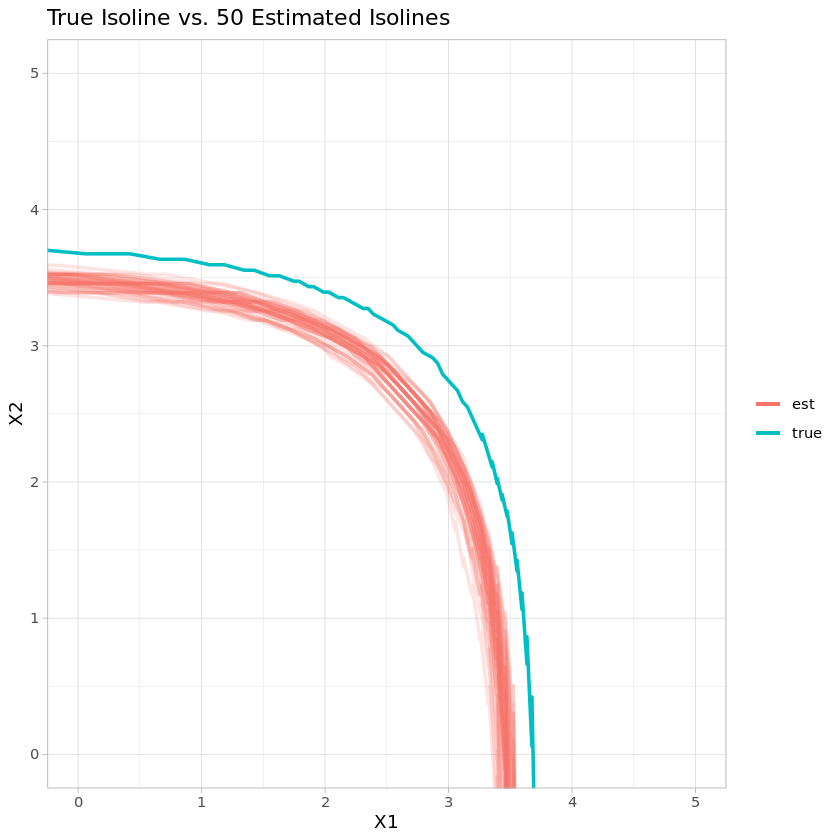

In [252]:
suppressWarnings(print(plt))

In [257]:
lb <- -5
ub <- 5
gticks <- 150
gsize <- 500

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [258]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [259]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

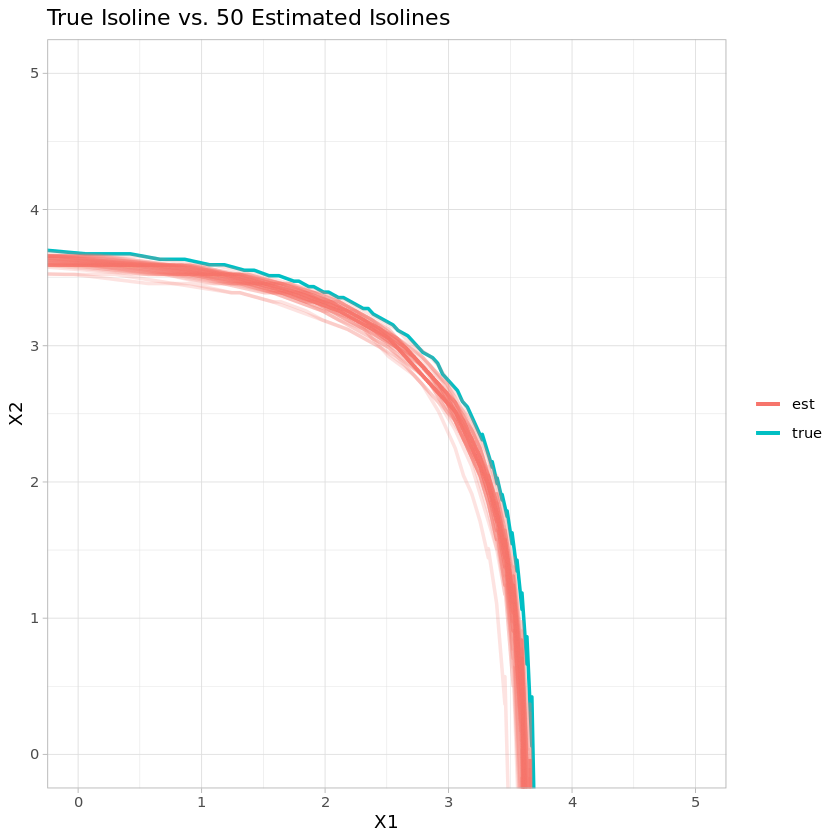

In [260]:
suppressWarnings(print(plt))

In [262]:
lb <- -5
ub <- 5
gticks <- 150
gsize <- 750

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [263]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [264]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

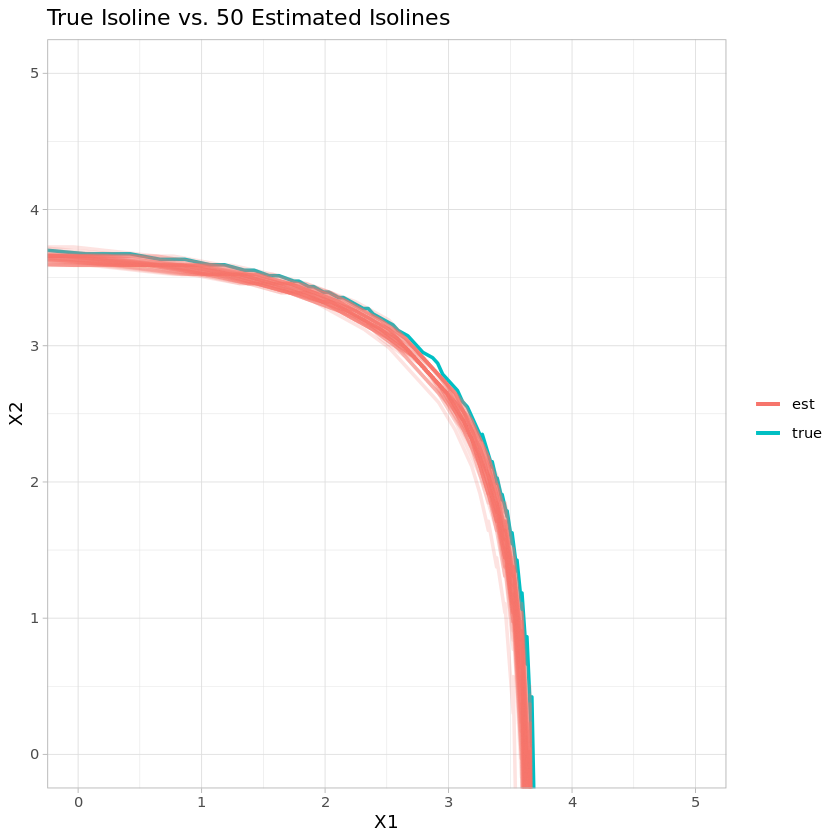

In [265]:
suppressWarnings(print(plt))

What if we use the same projected grid size as before, but now draw 50 isolines where we use the not-fast kernel survival function. What could we expect with the "true" estimate on this grid size, as opposed to an approximation (so don't need to worry about binning spacing, etc.)

In [16]:
lb <- -5
ub <- 5
gticks <- 150
gsize <- 750

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [17]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [18]:
kernSurv <- function(loc, dat, bw)
{
        p1 <- 1 - pnorm(loc[1], mean = dat[,1], sd = bw[1]/4)
        p2 <- 1 - pnorm(loc[2], mean = dat[,2], sd = bw[2]/4)
        return(mean(p1*p2))
}

In [ ]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    bw <- c(bandwidth.nrd(dat[,1]), bandwidth.nrd(dat[,2]))
    surv <- apply(grid, 1, kernSurv, dat=dat, bw=bw)
    isoline_est <- grid[abs(surv - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

In [ ]:
suppressWarnings(print(plt))

In [216]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 150

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [217]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [218]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

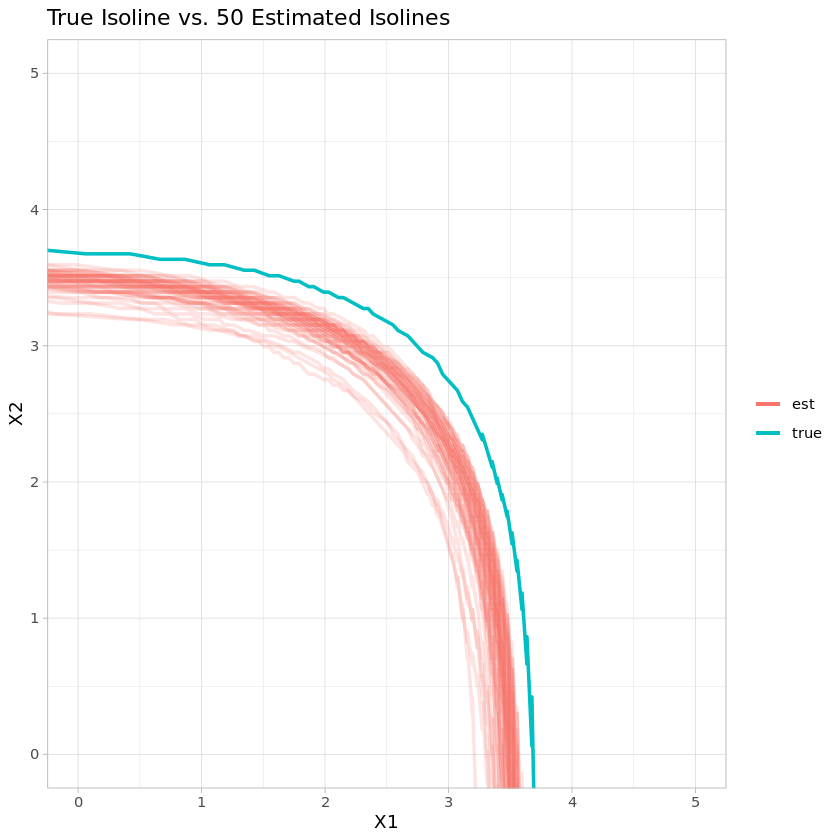

In [219]:
suppressWarnings(print(plt))

In [208]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 500

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [209]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [210]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

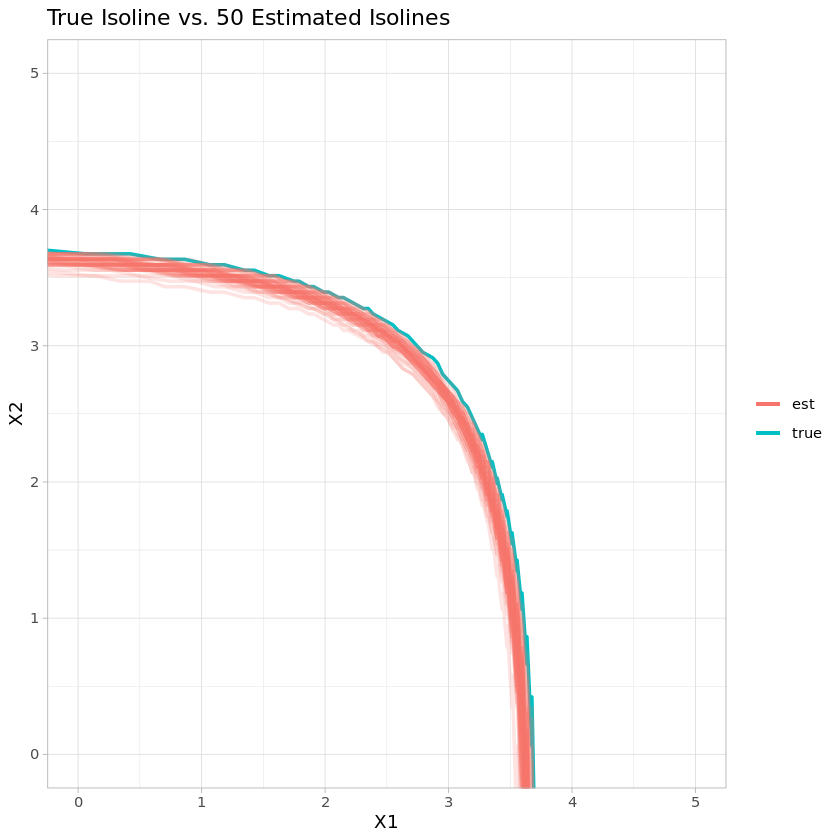

In [211]:
suppressWarnings(print(plt))

In [220]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 750

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [221]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [222]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

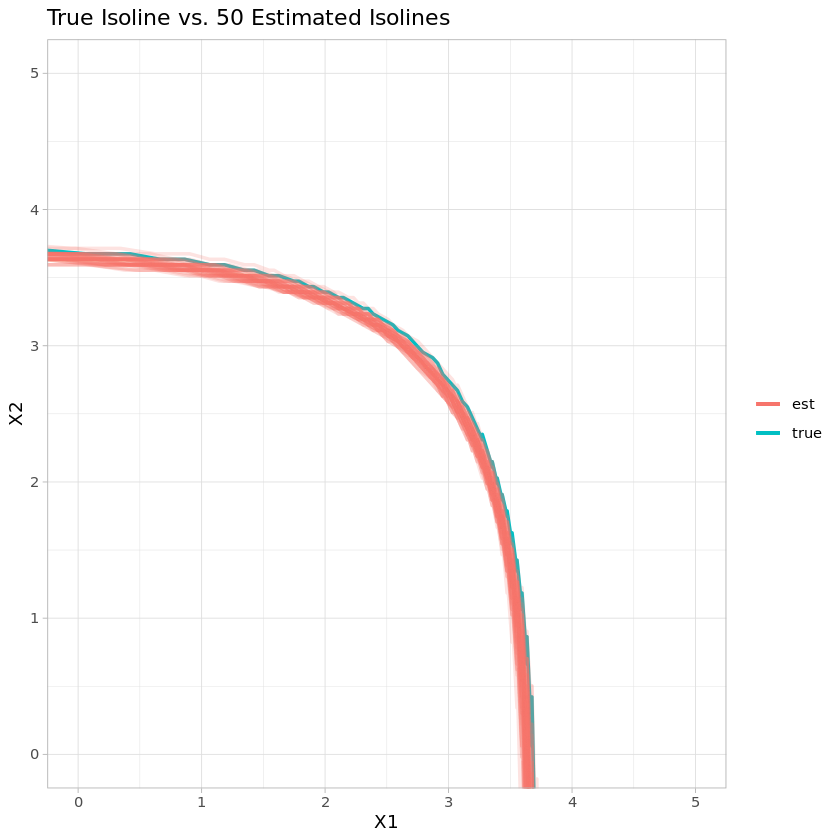

In [223]:
suppressWarnings(print(plt))

In [9]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 1000

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [10]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [11]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

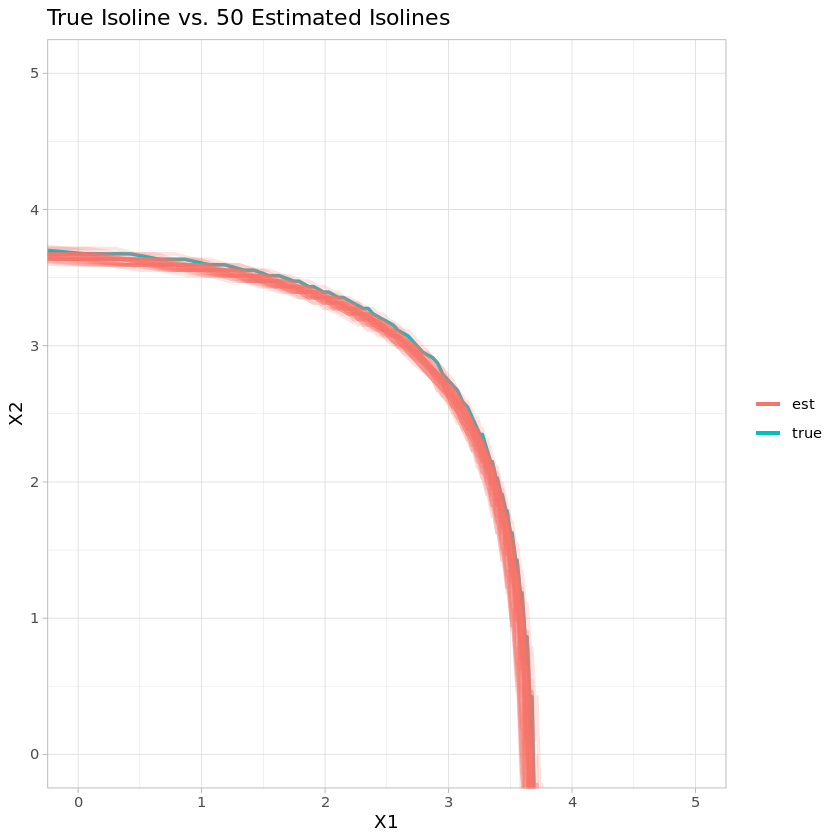

In [12]:
suppressWarnings(print(plt))

Now, let's try to make the isoline estimates using the exact KDE.

In [34]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 150

n_reps <- 50

p <- 0.05

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

beta <- 5e-4

In [35]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [36]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

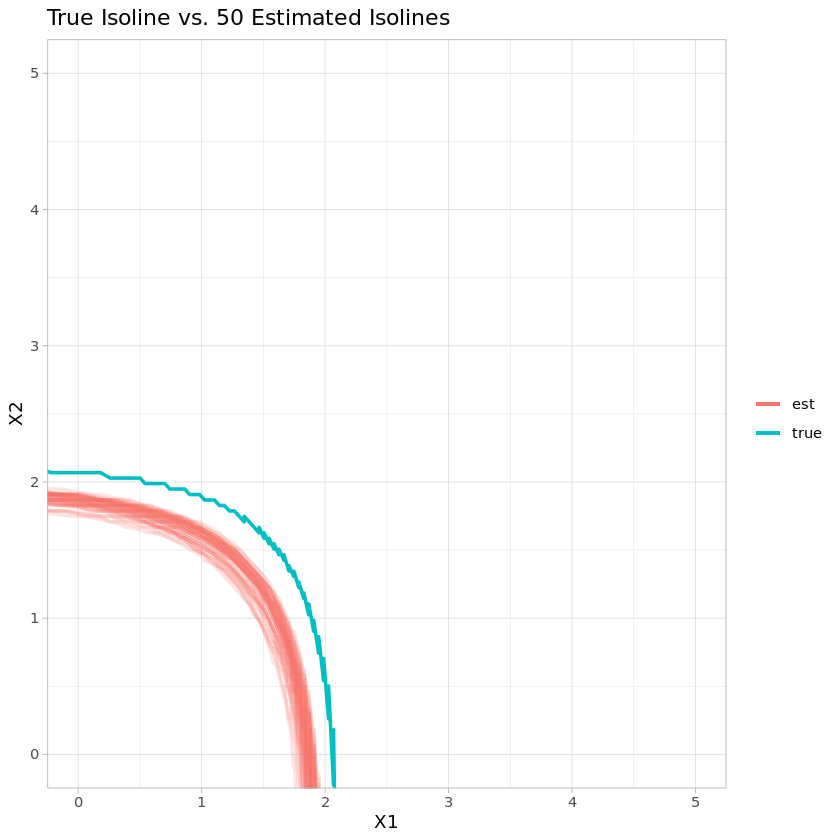

In [38]:
suppressWarnings(print(plt))

In [39]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 500

n_reps <- 50

p <- 0.05

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [40]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [41]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

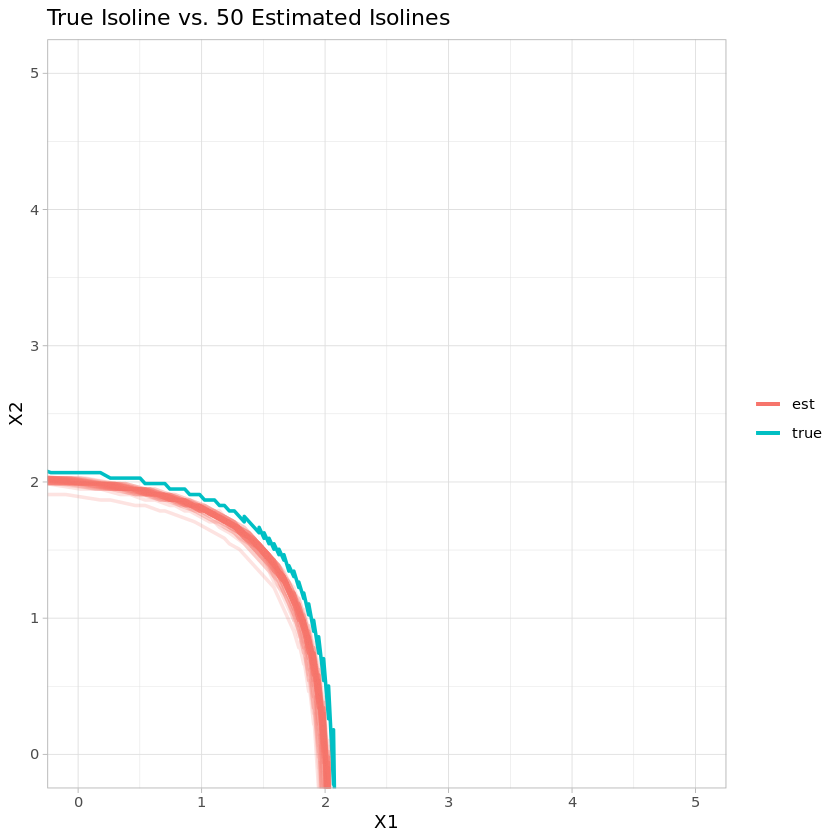

In [42]:
suppressWarnings(print(plt))

In [43]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 750

n_reps <- 50

p <- 0.05

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [44]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [45]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

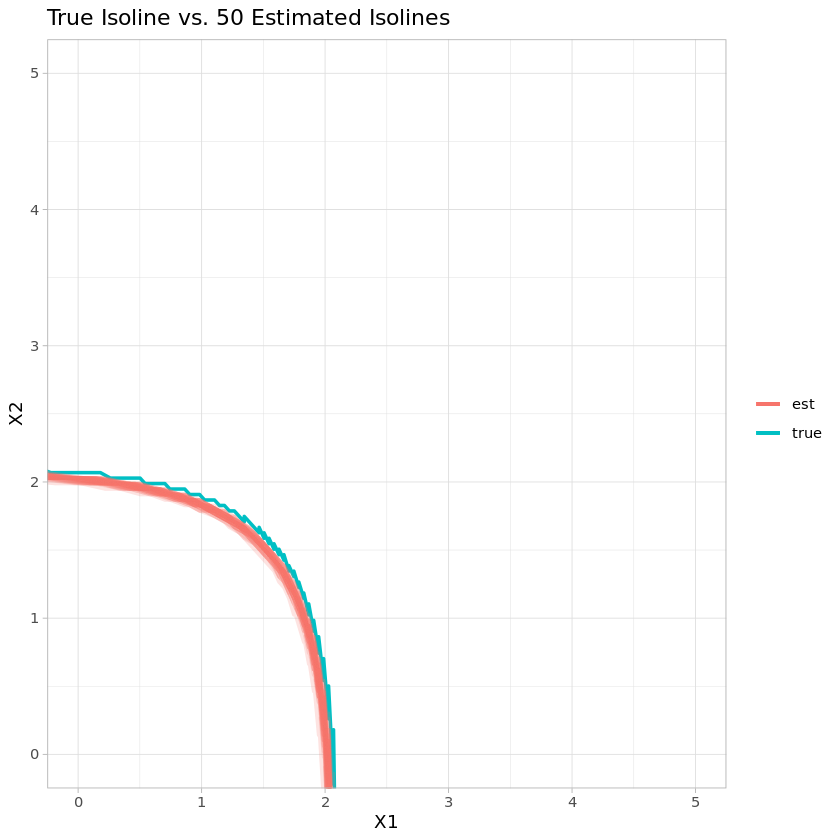

In [46]:
suppressWarnings(print(plt))

In [47]:
lb <- -5
ub <- 5
gticks <- 250
gsize <- 1000

n_reps <- 50

p <- 0.05

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [48]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [49]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

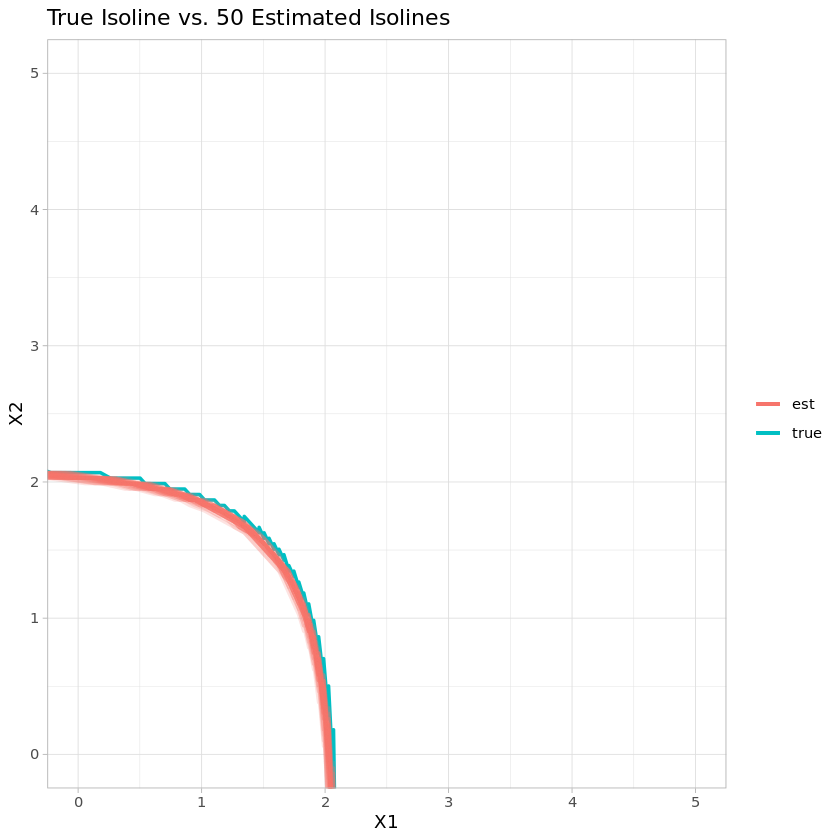

In [50]:
suppressWarnings(print(plt))

In [228]:
lb <- -5
ub <- 5
gticks <- 500
gsize <- 150

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [229]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [230]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

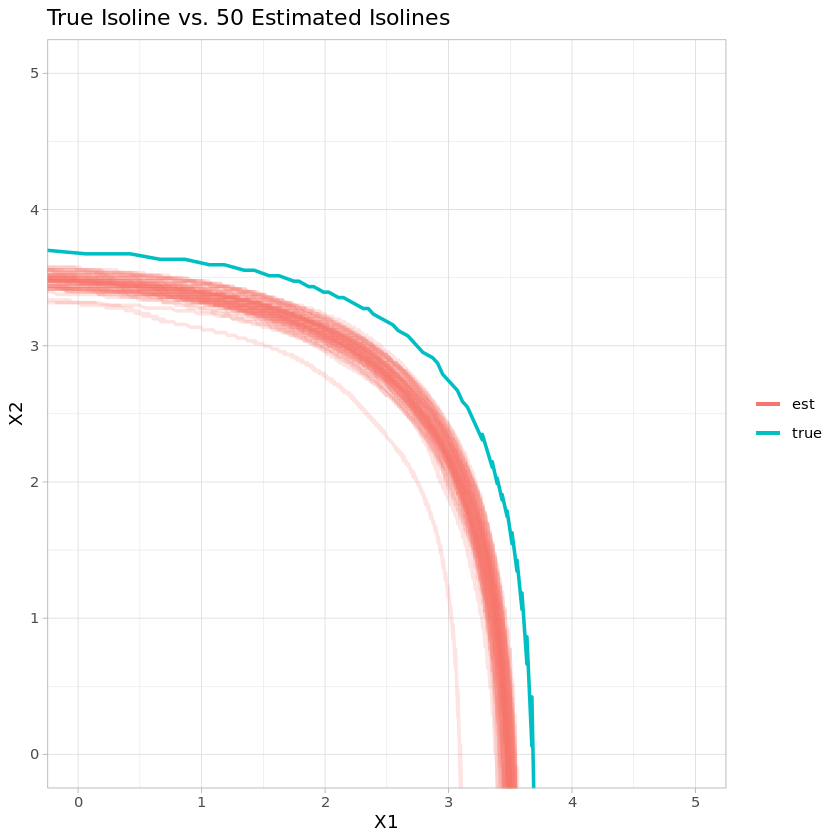

In [231]:
suppressWarnings(print(plt))

In [233]:
lb <- -5
ub <- 5
gticks <- 500
gsize <- 250

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [234]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [235]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

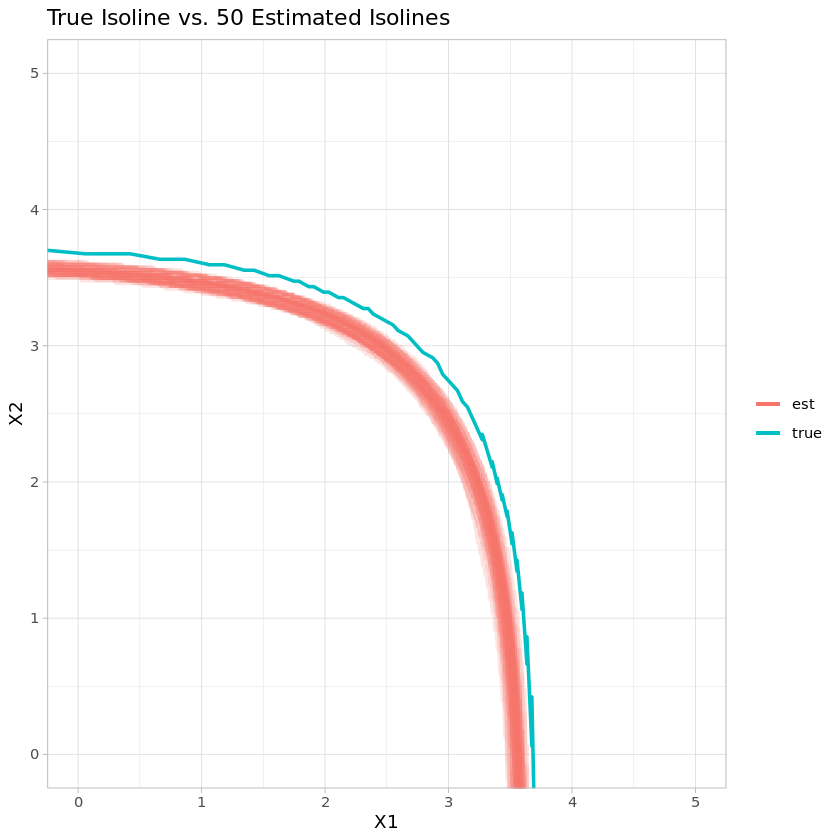

In [236]:
suppressWarnings(print(plt))

In [237]:
lb <- -5
ub <- 5
gticks <- 500
gsize <- 500

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [238]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [239]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

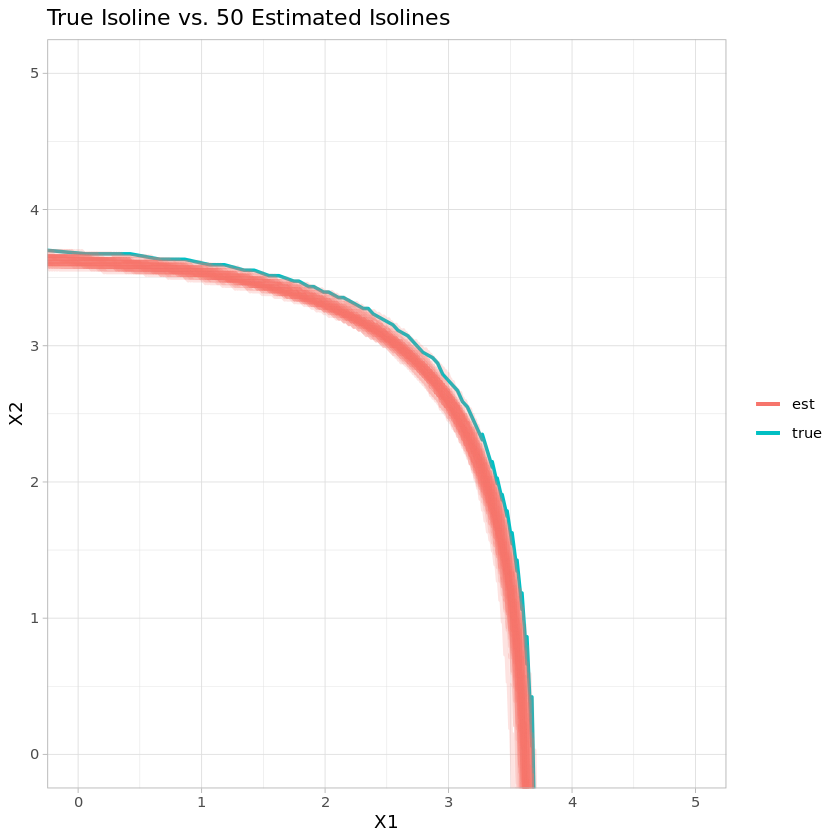

In [240]:
suppressWarnings(print(plt))

In [244]:
lb <- -5
ub <- 5
gticks <- 500
gsize <- 750

n_reps <- 50

p <- 0.01

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [245]:
isoline_true <- readRDS(paste0('/global/cscratch1/sd/jbbutler/isolines/bivariate_t/', p, '_bivt.RData'))
plt <- ggplot() + geom_line(data=isoline_true, aes(x=X1, y=X2, col = 'true'), size=1) + coord_cartesian(ylim=c(0, 5), xlim = c(0, 5)) + 
    theme_light() + theme(legend.title = element_blank()) + ggtitle(paste0('True Isoline vs. ', n_reps, ' Estimated Isolines'))

In [246]:
for (i in 1:n_reps) {

    dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))
    xmin <- c(min(min(dat$X1), lb), min(min(dat$X2), lb))
    xmax <- c(max(max(dat$X1), ub), max(max(dat$X2), ub))
    surv_func <- kcde(dat, eval.points=grid, gridsize=gsize, tail.flag='upper', xmin=xmin, xmax=xmax)
    isoline_est <- surv_func$eval.points[abs(surv_func$est - p) <= beta,]
    plt <- plt + geom_line(data=isoline_est, aes(x=X1, y=X2, col = 'est'), size=1, alpha = 0.2)
 
}

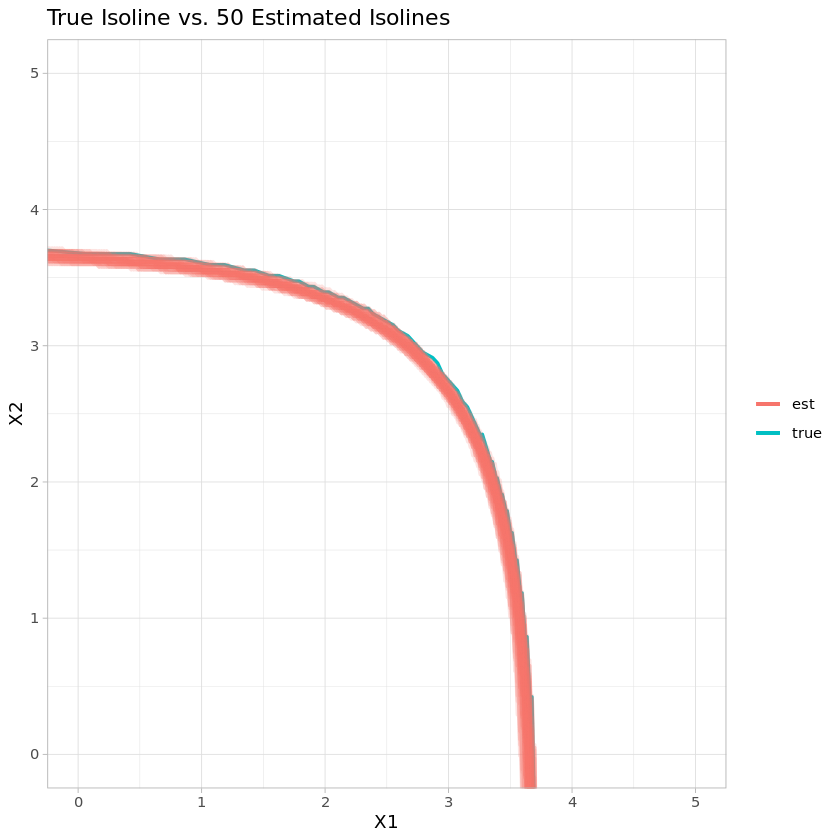

In [247]:
suppressWarnings(print(plt))

In [ ]:
isoline <- drawBivtIsoline(p = 0.05, grid = grid, tol = 0.0007)
isoline <- isoline %>% filter(X1 >= lb, X2 >= lb)
isoline_obj <- sfg_multipoint(isoline)

for (i in 1:length(files)) {

    sims_path <- paste0(path, files[i], '/')
    sims <- list.files(sims_path)
    n <- as.integer(substr(strsplit(files[i], '_')[[1]][[1]], 
                           start=0, stop=nchar(strsplit(files[i], '_')[[1]][[1]])-1))
    
    for (j in 1:length(sims)) {
        
        confregs <- readRDS(paste0(sims_path, sims[j]))
        
        for (k in 1:length(confregs)) {
            
            alpha <- confregs$alpha
            p <- confregs$p
            q <- confregs$beta_func
            
            upper <- confregs$Cu
            lower <- confregs$Cl
            conf_region_pts <- setdiff(upper, lower)
            conf_region_poly <- sfg_polygon(obj = concaveman(as.matrix(setdiff(upper, lower)), length_threshold=1))
            
            is_covered <- as.logical(st_contains(res$conf_region_poly, isoline_obj, sparse=FALSE))
            
        
        }
    }
}